In [112]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format

In [113]:
data = 'data/campaign-value-by-day-created-4-week-campaign-total.csv'
df = pd.read_csv(data)
df.style.format("{:.1f}")
df.head()

,date_trunc,sum
0,1/1/2017 12:00 AM UTC,nan
1,1/2/2017 12:00 AM UTC,9380.00
2,1/4/2017 12:00 AM UTC,53150.00
3,1/5/2017 12:00 AM UTC,170145.00
4,1/6/2017 12:00 AM UTC,22380.00


In [114]:
df.fillna(0, inplace=True)

In [115]:
df['date_trunc'] = pd.to_datetime(df['date_trunc'])

In [116]:
df.dtypes

date_trunc    datetime64[ns, UTC]
sum                       float64
dtype: object

In [117]:
df.set_index('date_trunc', inplace=True)
df.head()

,sum
date_trunc,
2017-01-01 00:00:00+00:00,0.00
2017-01-02 00:00:00+00:00,9380.00
2017-01-04 00:00:00+00:00,53150.00
2017-01-05 00:00:00+00:00,170145.00
2017-01-06 00:00:00+00:00,22380.00


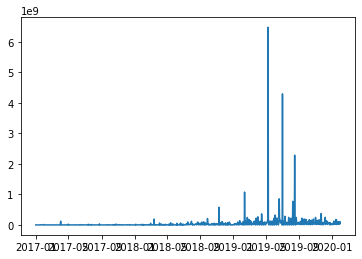

In [118]:
plt.plot(df.index, df['sum']);
plt.rcParams["figure.figsize"] = [16,9]

In [119]:
df['year'] = df.index.year
df['month'] = df.index.month

In [120]:
df['2019-06'].head()

,sum,year,month
date_trunc,,,
2019-06-01 00:00:00+00:00,2309730.00,2019,6
2019-06-02 00:00:00+00:00,0.00,2019,6
2019-06-03 00:00:00+00:00,274339500.38,2019,6
2019-06-04 00:00:00+00:00,321662313.53,2019,6
2019-06-05 00:00:00+00:00,256891004.84,2019,6


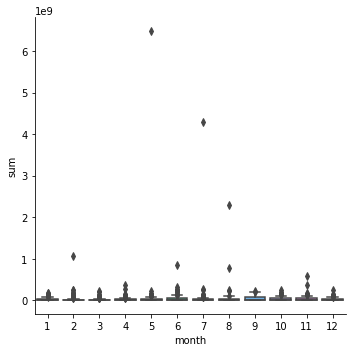

In [121]:
import seaborn as sns

sns.catplot(
    x='month',
    y='sum',
    data=df,
    kind='box'
);

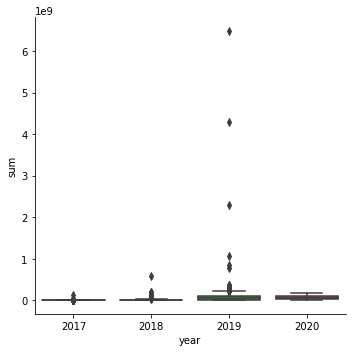

In [122]:
sns.catplot(
    x='year',
    y='sum',
    data=df,
    kind='box'
);

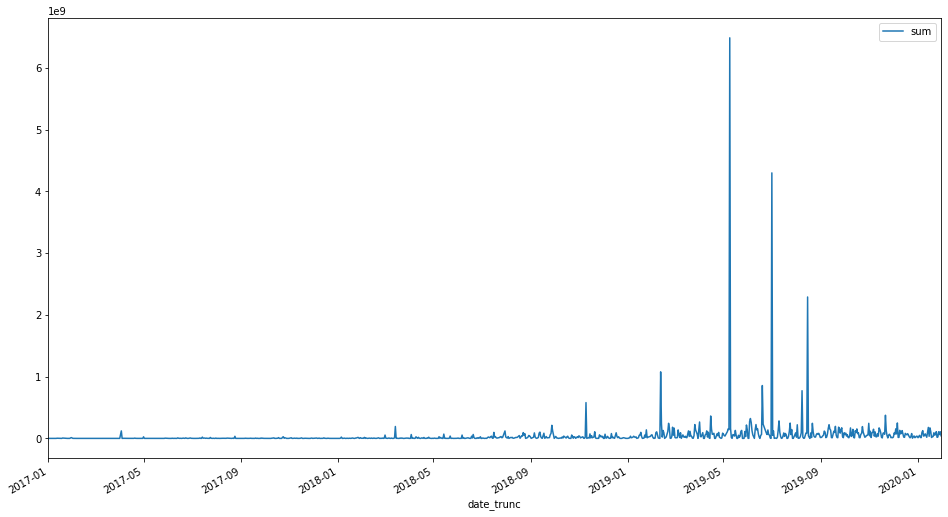

In [123]:
df[['sum']].plot()

In [124]:
weekly_df = df[['sum']].resample('W').sum().round()
weekly_df.style.format("{:.1f}")
weekly_df.head()

,sum
date_trunc,
2017-01-01 00:00:00+00:00,0.00
2017-01-08 00:00:00+00:00,390455.00
2017-01-15 00:00:00+00:00,2589575.00
2017-01-22 00:00:00+00:00,5823349.00
2017-01-29 00:00:00+00:00,492454.00


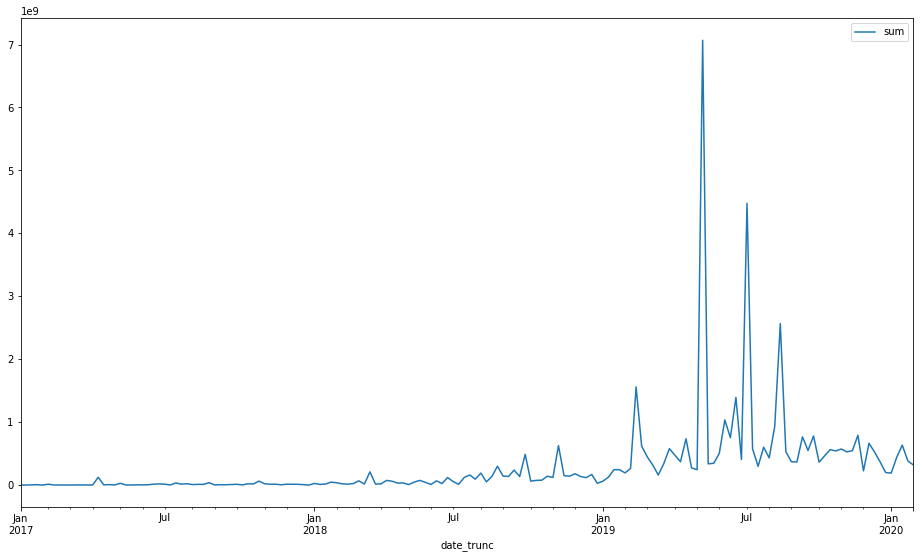

In [131]:
weekly_df.plot();

In [126]:
rolling_mean = weekly_df['sum'].resample('Q').sum().rolling(window=1, center=False).mean()
expanding_mean = weekly_df['sum'].resample('Q').sum().expanding().mean()

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,
/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


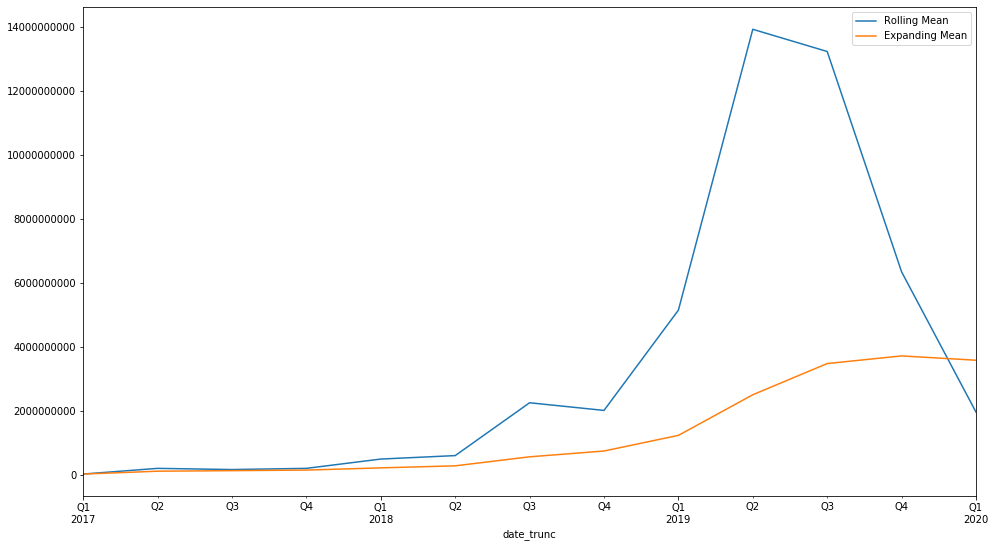

In [129]:
plt.rcParams["figure.figsize"] = [16,9]
fig, ax = plt.subplots()
ax.ticklabel_format(style='plain')
rolling_mean.plot(legend = True)
expanding_mean.plot(legend = True)
ax.legend(['Rolling Mean', 'Expanding Mean'])